In [1]:
from lib import ARCDatabase as adb
import numpy as np

In [2]:
options = dict()

options["atom1"] = "na"
options["atom2"] = "cs"
options["n1"] = 53 # This value will be replaced!
options["n2"] = 54 # This value will be replaced!
options["l1"] = 0
options["l2"] = 0
options["j1"] = 0.5
options["j2"] = 0.5
options["theta"] = 0
options["phi"] = 0
options["dn"] = 10
options["dl"] = 5
options["deltaMax"] = 10e9
options["nEig"] = 250
options["Bz"] = 0

calc = adb.Calculation('W:\\NaCsRydLab\\ryd_calculations.db')

In [3]:
n_na_start = 45
n_cs_start = 45

delta_n_na = 26
delta_n_cs = 26

energy_values = np.zeros((delta_n_na, delta_n_cs))
C6s = np.zeros((delta_n_na, delta_n_cs))

for n_na_i in range(delta_n_na):
    for n_cs_i in range(delta_n_cs):
        print('Calculating Na: ' + str(n_na_i) + ', Calculating Cs: ' + str(n_cs_i))
        n_na = n_na_start + n_na_i
        n_cs = n_cs_start + n_cs_i

        options["n1"] = n_na
        options["n2"] = n_cs

        C6, max_coupled_state, defect = calc.calculate_c6_perturbatively(options)
        
        energy_values[n_na_i, n_cs_i] = defect
        C6s[n_na_i, n_cs_i] = C6


Calculating Na: 0, Calculating Cs: 0
Calculating c6_na_cs_n1_45_n2_45_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 1
Calculating c6_na_cs_n1_45_n2_46_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 2
Calculating c6_na_cs_n1_45_n2_47_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 3
Calculating c6_na_cs_n1_45_n2_48_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 4
Calculating c6_na_cs_n1_45_n2_49_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 5
Calculating c6_na_cs_n1_45_n2_50_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 6
Calculating c6_na_cs_n1_45_n2_51_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating Cs: 7
Calculating c6_na_cs_n1_45_n2_52_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 0, Calculating C

In [4]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

style_sheet = 'C:\\Users\\goyan\\Downloads\\norm.mplstyle'
plt.style.use(style_sheet)

Text(0, 0.5, '$n_{Na}$')

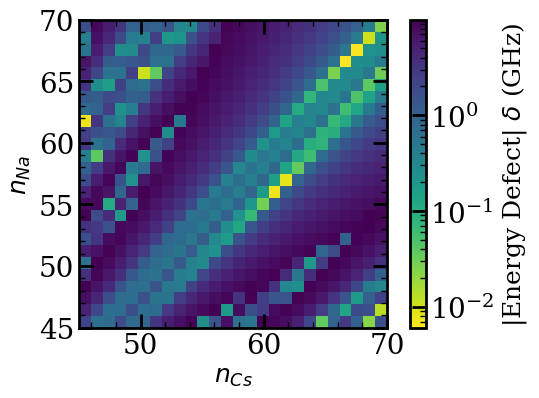

In [10]:
# Plot defects
plt.imshow(np.abs(energy_values),extent=[45, 70, 70, 45], norm=LogNorm(), cmap='viridis_r')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('|Energy Defect| $\delta$ (GHz)')
plt.xlabel('$n_{Cs}$')
plt.ylabel('$n_{Na}$')

Text(0, 0.5, '$n_{Na}$')

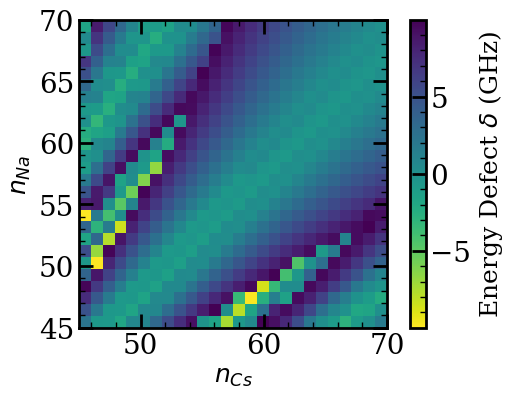

In [12]:
# Plot defects
plt.imshow(energy_values,extent=[45, 70, 70, 45], cmap='viridis_r')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('Energy Defect $\delta$ (GHz)')
plt.xlabel('$n_{Cs}$')
plt.ylabel('$n_{Na}$')

Text(0, 0.5, '$n_{Na}$')

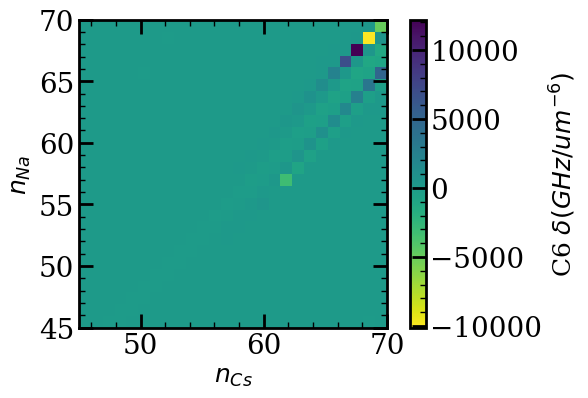

In [17]:
# Plot C6s
plt.imshow(C6s, extent=[45, 70, 70, 45], cmap='viridis_r')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('C6 $\delta (GHz / um^{-6}) $')
plt.xlabel('$n_{Cs}$')
plt.ylabel('$n_{Na}$')

Text(0, 0.5, '$n_{Na}$')

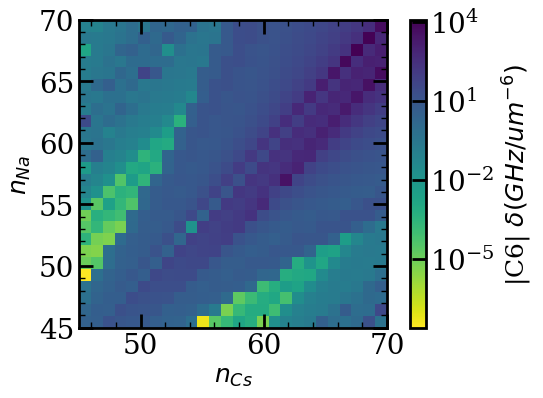

In [18]:
# Plot C6s
plt.imshow(np.abs(C6s), extent=[45, 70, 70, 45], norm=LogNorm(), cmap='viridis_r')
plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label('|C6| $\delta (GHz / um^{-6}) $')
plt.xlabel('$n_{Cs}$')
plt.ylabel('$n_{Na}$')

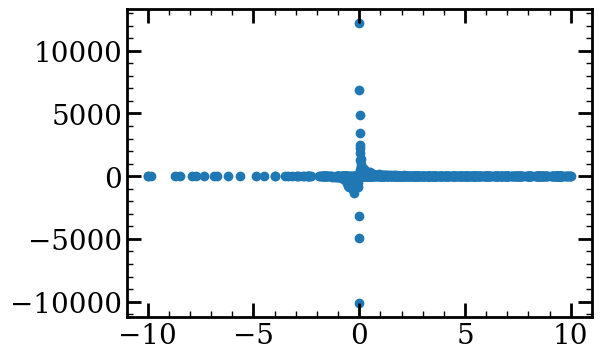

In [21]:
plt.scatter(energy_values, C6s)

In [27]:
# List the most promising pair states

import heapq

# create list of n_na, n_cs, c6 for heapq to sort through

master_list = [(n_na_start + i, n_cs_start + j, C6s[i,j], np.abs(C6s[i,j])) for i in range(delta_n_na) for j in range(delta_n_cs)] 
results = heapq.nlargest(50, master_list, key=lambda x:x[3])

In [28]:
results

[(68, 68, 12196.788572031275, 12196.788572031275),
 (69, 69, -10115.217858076669, 10115.217858076669),
 (67, 67, 6848.39465147417, 6848.39465147417),
 (70, 70, -4910.060427823517, 4910.060427823517),
 (66, 70, 4881.469764746625, 4881.469764746625),
 (65, 69, 3454.1868986777686, 3454.1868986777686),
 (57, 62, -3165.9092628958883, 3165.9092628958883),
 (64, 68, 2488.0946158320385, 2488.0946158320385),
 (66, 66, 2281.85476105092, 2281.85476105092),
 (63, 67, 1814.0302378933113, 1814.0302378933113),
 (62, 66, 1333.7379057382484, 1333.7379057382484),
 (68, 70, -1303.6098189277532, 1303.6098189277532),
 (65, 65, 1262.6492422509418, 1262.6492422509418),
 (67, 69, -1105.1584424516666, 1105.1584424516666),
 (61, 65, 986.3302875520532, 986.3302875520532),
 (66, 68, -934.6360092101795, 934.6360092101795),
 (67, 70, -887.5936478256967, 887.5936478256967),
 (58, 63, -846.5403377368172, 846.5403377368172),
 (64, 64, 793.1308120825399, 793.1308120825399),
 (65, 67, -788.443209670842, 788.443209670842

In [30]:
n_cs_start2 = 45

delta_n_cs2 = 26

energy_values_cs = np.zeros(delta_n_cs2)
C6s_cs = np.zeros(delta_n_cs2)

for n_cs_i in range(delta_n_cs2):
    print('Calculating Na: ' + str(n_na_i) + ', Calculating Cs: ' + str(n_cs_i))
    n_cs = n_cs_start2 + n_cs_i

    options["atom1"] = "cs"
    options["atom2"] = "cs"
    options["n1"] = n_cs
    options["n2"] = n_cs

    C6, max_coupled_state, defect = calc.calculate_c6_perturbatively(options)
    
    energy_values_cs[n_cs_i] = defect
    C6s_cs[n_cs_i] = C6


Calculating Na: 25, Calculating Cs: 0
c6_cs_cs_n1_45_n2_45_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000 is already calculated
Calculating Na: 25, Calculating Cs: 1
Calculating c6_cs_cs_n1_46_n2_46_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 25, Calculating Cs: 2
Calculating c6_cs_cs_n1_47_n2_47_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 25, Calculating Cs: 3
Calculating c6_cs_cs_n1_48_n2_48_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 25, Calculating Cs: 4
Calculating c6_cs_cs_n1_49_n2_49_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 25, Calculating Cs: 5
Calculating c6_cs_cs_n1_50_n2_50_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 25, Calculating Cs: 6
Calculating c6_cs_cs_n1_51_n2_51_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 25, Calculating Cs: 7
Calculating c6_cs_cs_n1_52_n2_52_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na

In [35]:
master_list_cs = [(n_cs_start2 + i, n_cs_start2 + i, C6s_cs[i], np.abs(C6s_cs[i])) for i in range(delta_n_cs2)] 
results_cs = heapq.nlargest(25, master_list_cs, key=lambda x:x[3])

In [36]:
results_cs

[(70, 70, -656.1241280068665, 656.1241280068665),
 (69, 69, -552.0734989821038, 552.0734989821038),
 (68, 68, -463.2586869829961, 463.2586869829961),
 (67, 67, -387.6395796781789, 387.6395796781789),
 (66, 66, -323.42312164760534, 323.42312164760534),
 (65, 65, -269.0360998254868, 269.0360998254868),
 (64, 64, -223.10186962258857, 223.10186962258857),
 (63, 63, -184.4179999454215, 184.4179999454215),
 (62, 62, -151.93660449400744, 151.93660449400744),
 (61, 61, -124.74689710886476, 124.74689710886476),
 (60, 60, -102.05911547387834, 102.05911547387834),
 (59, 59, -83.19019230280877, 83.19019230280877),
 (58, 58, -67.55090401756306, 67.55090401756306),
 (57, 57, -54.63437256812423, 54.63437256812423),
 (56, 56, -44.005593678519375, 44.005593678519375),
 (55, 55, -35.29316914194952, 35.29316914194952),
 (54, 54, -28.179165417185228, 28.179165417185228),
 (53, 53, -22.39508393466971, 22.39508393466971),
 (52, 52, -17.71271792101159, 17.71271792101159),
 (51, 51, -13.938367232435304, 13.93

In [37]:
n_na_start2 = 45

delta_n_na2 = 26

energy_values_na = np.zeros(delta_n_na2)
C6s_na = np.zeros(delta_n_na2)

for n_na_i in range(delta_n_na2):
    print('Calculating Na: ' + str(n_na_i) + ', Calculating Cs: ' + str(n_cs_i))
    n_na = n_na_start2 + n_na_i

    options["atom1"] = "na"
    options["atom2"] = "na"
    options["n1"] = n_na
    options["n2"] = n_na

    C6, max_coupled_state, defect = calc.calculate_c6_perturbatively(options)
    
    energy_values_na[n_na_i] = defect
    C6s_na[n_na_i] = C6

Calculating Na: 0, Calculating Cs: 25
Calculating c6_na_na_n1_45_n2_45_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 1, Calculating Cs: 25
Calculating c6_na_na_n1_46_n2_46_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 2, Calculating Cs: 25
Calculating c6_na_na_n1_47_n2_47_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 3, Calculating Cs: 25
Calculating c6_na_na_n1_48_n2_48_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 4, Calculating Cs: 25
Calculating c6_na_na_n1_49_n2_49_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 5, Calculating Cs: 25
Calculating c6_na_na_n1_50_n2_50_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 6, Calculating Cs: 25
Calculating c6_na_na_n1_51_n2_51_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 7, Calculating Cs: 25
Calculating c6_na_na_n1_52_n2_52_l1_0_l2_0_j1_0_5_j2_0_5_dn_10_deltaMax_10000000000
Calculating Na: 8, Calcu

In [38]:
master_list_na = [(n_na_start2 + i, n_na_start2 + i, C6s_na[i], np.abs(C6s_na[i])) for i in range(delta_n_na2)] 
results_na = heapq.nlargest(25, master_list_na, key=lambda x:x[3])
results_na

[(70, 70, -1862.063271364251, 1862.063271364251),
 (69, 69, -1574.110263730699, 1574.110263730699),
 (68, 68, -1327.287923852684, 1327.287923852684),
 (67, 67, -1116.2215628194394, 1116.2215628194394),
 (66, 66, -936.1713889641392, 936.1713889641392),
 (65, 65, -782.9657320362855, 782.9657320362855),
 (64, 64, -652.9403778641686, 652.9403778641686),
 (63, 63, -542.8836979908972, 542.8836979908972),
 (62, 62, -449.9865600313986, 449.9865600313986),
 (61, 61, -371.79744542199313, 371.79744542199313),
 (60, 60, -306.18258770536295, 306.18258770536295),
 (59, 59, -251.28794106202403, 251.28794106202403),
 (58, 58, -205.50735058648314, 205.50735058648314),
 (57, 57, -167.45274688376526, 167.45274688376526),
 (56, 56, -135.92771468687917, 135.92771468687917),
 (55, 55, -109.90385951145754, 109.90385951145754),
 (54, 54, -88.49972542990614, 88.49972542990614),
 (53, 53, -70.96203092460622, 70.96203092460622),
 (52, 52, -56.6490096947859, 56.6490096947859),
 (51, 51, -45.01563420180311, 45.015

# Looking for attractive interactions

In [4]:
logs = (energy_values < 1) & (energy_values > 0)
xs, ys = np.where(logs)
# Find minimum defect state
idx = np.argmin(energy_values[xs, ys])
n1 = n_na_start + xs[idx]
n2 = n_cs_start + ys[idx]
print([n1,n2])
print(energy_values[xs[idx], ys[idx]])

[67, 67]
0.0060534855085647155


In [5]:
# Question: Do all these states have the same sign of C6
these_defects = energy_values[xs, ys]
these_C6s = C6s[xs, ys]

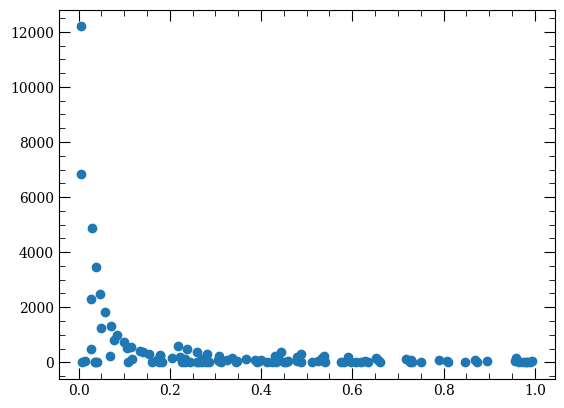

In [6]:
from matplotlib import pyplot as plt

plt.scatter(these_defects, these_C6s)

In [7]:
logs2 = (energy_values > -1) & (energy_values < 0)
xs2, ys2 = np.where(logs2)
# Find minimum defect state
idx2 = np.argmax(energy_values[xs2, ys2])
n12 = n_na_start + xs2[idx2]
n22 = n_cs_start + ys2[idx2]
print([n12,n22])
print(energy_values[xs2[idx2], ys2[idx2]])

[56, 61]
-0.007391950989803952


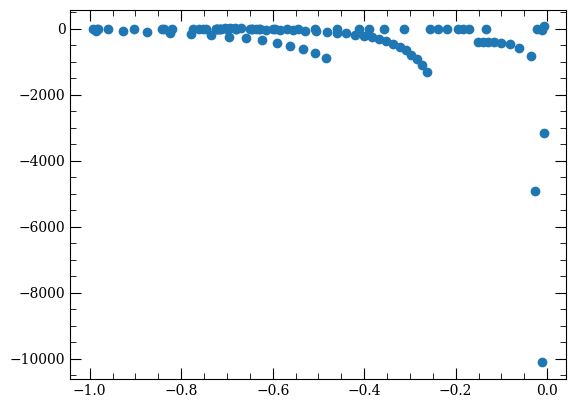

In [8]:
these_defects = energy_values[xs2, ys2]
these_C6s = C6s[xs2, ys2]
plt.scatter(these_defects, these_C6s)

In [9]:
# We should probably find the states with the largest C6s
idx1, idx2 = np.unravel_index(np.argmax(C6s), C6s.shape)
print(idx1)
print(idx2)
print(C6s[idx1, idx2])
n_na_highestC6 = n_na_start + idx1
n_cs_highestC6 = n_cs_start + idx2
print(n_na_highestC6)
print(n_cs_highestC6)

23
23
12196.788572031275
68
68


In [10]:
# Perform full diagonalization
options["n1"] = n_na_highestC6
options["n2"] = n_cs_highestC6
options["dn"] = 5

rs = np.linspace(3,10, 101)
res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

3.0 has already been calculated!
3.07 has already been calculated!
3.14 has already been calculated!
3.21 has already been calculated!
3.2800000000000002 has already been calculated!
3.35 has already been calculated!
3.42 has already been calculated!
3.49 has already been calculated!
3.56 has already been calculated!
3.63 has already been calculated!
3.7 has already been calculated!
3.77 has already been calculated!
3.84 has already been calculated!
3.91 has already been calculated!
3.98 has already been calculated!
4.05 has already been calculated!
4.12 has already been calculated!
4.19 has already been calculated!
4.26 has already been calculated!
4.33 has already been calculated!
4.4 has already been calculated!
4.470000000000001 has already been calculated!
4.54 has already been calculated!
4.61 has already been calculated!
4.68 has already been calculated!
4.75 has already been calculated!
4.82 has already been calculated!
4.890000000000001 has already been calculated!
4.96 has al

In [11]:
# now we need to extract the correct eigenvector at each r
# first identify the correct basis vector
main_idx = -1
for idx, val in enumerate(res_basis):
    if val[0] == options["n1"] and val[1] == options["l1"] and val[2] == options["j1"] and val[4] == options["n2"] and val[5] == options["l2"] and val[6] == options["j2"]:
        main_idx = idx
        break
res_basis[main_idx]

[68, 0, 0.5, 0.5, 68, 0, 0.5, 0.5]

In [12]:
evals = []
comps = []
for idx, evec in enumerate(res_evecs):
    comp = np.abs(evec[main_idx, :])**2
    this_idx = np.argmax(comp)
    evals.append(res_evals[idx][this_idx])
    comps.append(comp[this_idx])


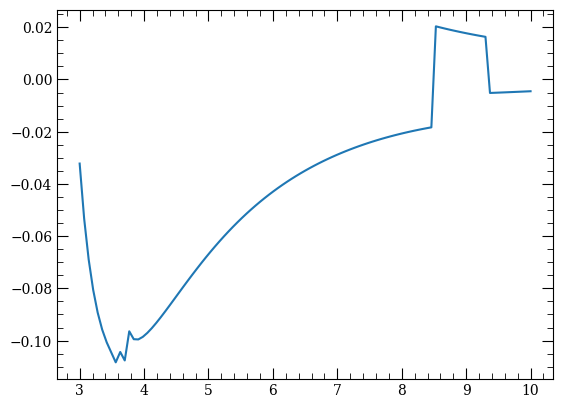

In [13]:
plt.plot(res_rs, evals)

In [14]:
from lib import utils

In [17]:
these_evals, these_comps, these_idxs = utils.get_maximum_overlap_eigenstate(res_evals, res_evecs, res_basis, **options)

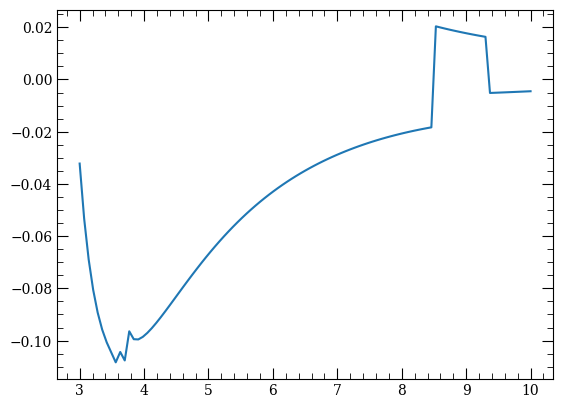

In [18]:
plt.plot(res_rs, these_evals)

In [22]:
these_states, largest_elements = utils.find_highest_n_comps(res_evecs[100][:, 150], 10, res_basis)

In [24]:
print(these_states)
print(largest_elements)

[[68, 0, 0.5, 0.5, 68, 0, 0.5, 0.5], [67, 1, 0.5, 0.5, 68, 1, 0.5, 0.5], [67, 1, 1.5, 0.5, 68, 1, 0.5, 0.5], [67, 1, 1.5, 1.5, 68, 1, 0.5, -0.5], [66, 2, 2.5, 0.5, 67, 2, 1.5, 0.5], [66, 2, 2.5, 1.5, 67, 2, 1.5, -0.5], [67, 1, 1.5, 0.5, 68, 1, 1.5, 0.5], [66, 2, 1.5, 0.5, 67, 2, 1.5, 0.5], [66, 2, 2.5, 2.5, 67, 2, 1.5, -1.5], [67, 1, 0.5, 0.5, 68, 1, 1.5, 0.5]]
(0.46626590512424415, 0.21350771095481258, 0.18292043244617387, 0.13679864837409283, 0.0001096140286999332, 9.727846208503756e-05, 6.495727131682854e-05, 5.50705113490552e-05, 4.049042850470671e-05, 3.4721582325226405e-05)


In [25]:
these_evals2, these_comps2, these_idxs2 = utils.get_maximum_overlap_eigenstate(res_evals, res_evecs, res_basis, n1 = 67, l1 = 1, j1 = 0.5, n2 = 68, l2 = 1, j2 = 0.5)

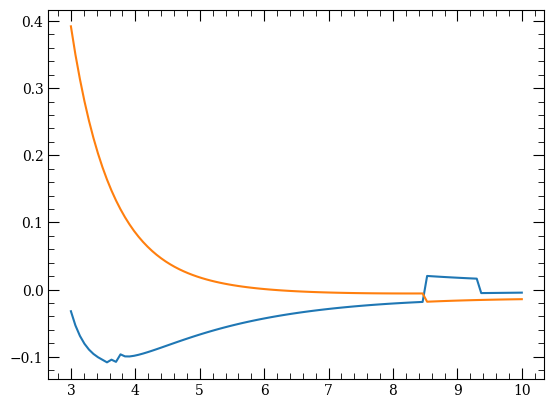

In [26]:
plt.plot(res_rs, these_evals)
plt.plot(res_rs, these_evals2)

In [42]:
import heapq
comps = np.abs(res_evecs[100][:, 0])**2

largest_with_indices = heapq.nlargest(10, enumerate(comps), key=lambda x: x[1])

In [43]:
largest_with_indices

[(620, 0.48892600122391566),
 (614, 0.3666955331219451),
 (619, 0.10302405397156464),
 (613, 0.04120966591567214),
 (586, 3.94750581634841e-05),
 (578, 2.631678172069106e-05),
 (605, 1.8017843705738548e-05),
 (585, 1.4704314843843503e-05),
 (595, 1.4414317045585524e-05),
 (596, 5.032504674699259e-06)]

In [49]:
indices, largest_elements = zip(*largest_with_indices)
res_basis[indices]

TypeError: list indices must be integers or slices, not tuple

In [20]:
np.abs(np.array([1 + 1j, 1 + 2j]))**2

array([2., 5.])

In [28]:
# Perform full diagonalization
options["n1"] = 48
options["n2"] = 62
options["dn"] = 5

rs = np.linspace(3,10, 101)
res_rs, res_evals, res_evecs, res_basis = calc.calculate_pair_interaction(rs, options, tolerance=0.01)

Calculating for [3.0, 3.07, 3.14, 3.21, 3.2800000000000002, 3.35, 3.42, 3.49, 3.56, 3.63, 3.7, 3.77, 3.84, 3.91, 3.98, 4.05, 4.12, 4.19, 4.26, 4.33, 4.4, 4.470000000000001, 4.54, 4.61, 4.68, 4.75, 4.82, 4.890000000000001, 4.96, 5.03, 5.1, 5.17, 5.24, 5.3100000000000005, 5.380000000000001, 5.45, 5.5200000000000005, 5.59, 5.66, 5.73, 5.800000000000001, 5.87, 5.94, 6.01, 6.08, 6.15, 6.220000000000001, 6.290000000000001, 6.36, 6.43, 6.5, 6.57, 6.640000000000001, 6.710000000000001, 6.78, 6.8500000000000005, 6.92, 6.99, 7.0600000000000005, 7.130000000000001, 7.2, 7.2700000000000005, 7.340000000000001, 7.41, 7.48, 7.550000000000001, 7.62, 7.69, 7.760000000000001, 7.83, 7.9, 7.970000000000001, 8.040000000000001, 8.11, 8.18, 8.25, 8.32, 8.39, 8.46, 8.530000000000001, 8.600000000000001, 8.670000000000002, 8.74, 8.81, 8.88, 8.95, 9.02, 9.09, 9.16, 9.23, 9.3, 9.370000000000001, 9.440000000000001, 9.510000000000002, 9.580000000000002, 9.65, 9.72, 9.790000000000001, 9.86, 9.93, 10.0]

Calculating Ha

In [29]:
# now we need to extract the correct eigenvector at each r
# first identify the correct basis vector
main_idx = -1
for idx, val in enumerate(res_basis):
    if val[0] == options["n1"] and val[1] == options["l1"] and val[2] == options["j1"] and val[4] == options["n2"] and val[5] == options["l2"] and val[6] == options["j2"]:
        main_idx = idx
        break
res_basis[main_idx]

[48, 0, 0.5, 0.5, 62, 0, 0.5, 0.5]

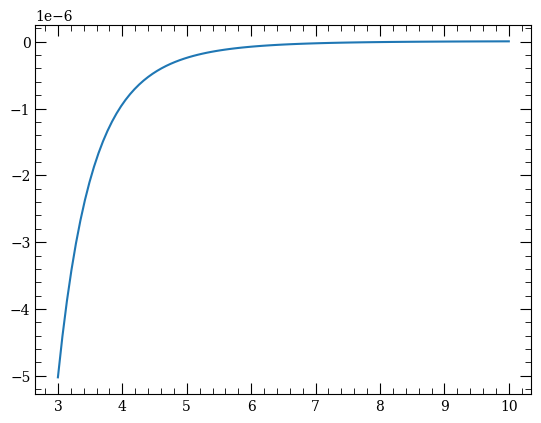

In [31]:
evals = []
comps = []
for idx, evec in enumerate(res_evecs):
    comp = np.abs(evec[main_idx, :])**2
    this_idx = np.argmax(comp)
    evals.append(res_evals[idx][this_idx])
    comps.append(comp[this_idx])
plt.plot(res_rs, evals)